# Customer Churn Prediction using ANN

The dataset I used here is from "https://www.kaggle.com/blastchar/telco-customer-churn".

## Import libraries and data

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
df = pd.read_csv('../WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [226]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Preprocessing the Data
- Drop the unuseful columns
- Change data type (object to others)
- Transfer categorical columns into numeric
- Scale the features

In [227]:
# Drop the unuseful column
df.drop('customerID',axis =1, inplace = True)

# Check the features type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From the above information, it can be found that **'TotalCharges'** is **'object'** instead of 'float64', which is the type of 'MonthlyCharges'. So, I need to change it to be float64 by using **pd.to_numeric()**.

In [228]:
df1 = df[df['TotalCharges'] != ' ']

In [229]:
# Change the data type of TotalCharges
df1['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# errors = 'coerce' is added to make sure that whatever values it have will be transfered.
# otherwise if there are " " existing, there are value error

C:\Users\xiaoj\AppData\Local\Temp/ipykernel_18264/555493019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')


In [230]:
# Since 11 is not big compared with the total samples, we can drop these samples
df1.shape

(7032, 20)

In [231]:
# Double check if the dtype of TotalCharges has been changed
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [232]:
# Check the unique values of each column
for column in  df:
    #VIP STEPS
    # This is to make sure the columns are categorical instead of numerical
    if df[column].dtypes == 'object':
        print(f'{column}:{df[column].unique()}')

# We can define a function to do the above step:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


From above results, it can be seen there are "No internet service" or 'No phone service' besides 'No' and 'Yes', so we can replace it with 'No'.

In [233]:
# Replace the 'No internet service' with no
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


C:\Users\xiaoj\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [234]:
# create an array with their values to be only 'No' or 'Yes'
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

# to transfer yes/no to 1/0
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace = True)

C:\Users\xiaoj\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [235]:
# Check the current unique values in columns
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [236]:
# Transfer the gender column
df1['gender'].replace({'Female':1, 'Male':0},inplace = True)

# One-hot the other left columns
# VIP STEP: make sure use a new df2 since changed the previous columns numbers
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract','PaymentMethod'])

#Check the results after replacement and on-hot code
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [237]:
# In deep learning, scaling the feature is very important

# Scaling step 1: find which columns need to be scaled
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

# Scaling step2: use the sklearn function to scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [238]:
# Check the df2 after scaling
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [273]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

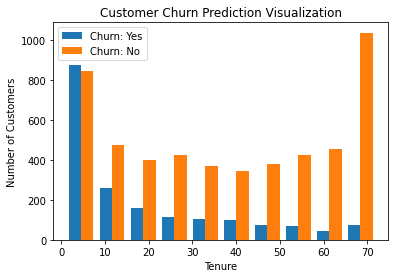

In [282]:
# Check Tenue vs. Churn
tenure_churn_no = df1[df1['Churn'] == 0]['tenure']
tenure_churn_yes = df1[df1['Churn'] == 1]['tenure']

# VIP STEPS
plt.hist([tenure_churn_yes, tenure_churn_no], label = ['Churn: Yes','Churn: No'])
plt.legend()

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')


It can be easily found that the more times customer stay with the company the less likely they churn.

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

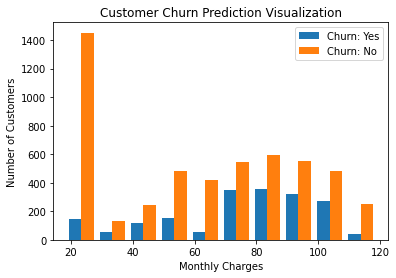

In [283]:
# Check Monthly charges vs. churn
mc_churn_no = df1[df1['Churn'] == 0]['MonthlyCharges']
mc_churn_yes = df1[df1['Churn'] == 1]['MonthlyCharges']

plt.hist([mc_churn_yes, mc_churn_no], label = ['Churn: Yes','Churn: No'])
plt.legend()

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

## Split the data

In [240]:
x = df2.drop('Churn', axis = 1)
y = df2['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Create and Evaluate models 

In [242]:
import tensorflow as tf
from tensorflow import keras
 
    
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (len(x_train.columns),), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')])


model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
176/176 [==============================] - 0s 941us/step - loss: 0.5428 - accuracy: 0.6960
Epoch 2/5
176/176 [==============================] - 0s 986us/step - loss: 0.4276 - accuracy: 0.7943
Epoch 3/5
176/176 [==============================] - 0s 873us/step - loss: 0.4198 - accuracy: 0.8046
Epoch 4/5
176/176 [==============================] - 0s 833us/step - loss: 0.4160 - accuracy: 0.8034
Epoch 5/5
176/176 [==============================] - 0s 911us/step - loss: 0.4119 - accuracy: 0.8059


In [243]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 680us/step - loss: 0.4430 - accuracy: 0.7896


[0.443026602268219, 0.7896233201026917]

In [246]:
model.predict(x_test)

array([[0.32592526],
       [0.37656203],
       [0.05932882],
       ...,
       [0.67038137],
       [0.04596841],
       [0.05059406]], dtype=float32)

In [259]:
y_pred_prob = model.predict(x_test)

# Since the y_pred produce the probability, we need to transfer to the binary output
y_pred = []
for i in y_pred_prob:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:5]

[0, 0, 0, 0, 0]

In [260]:
y_test[:5]

6111    0
1249    1
5066    0
4360    0
4672    0
Name: Churn, dtype: int64

In [261]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1019
           1       0.65      0.52      0.58       388

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

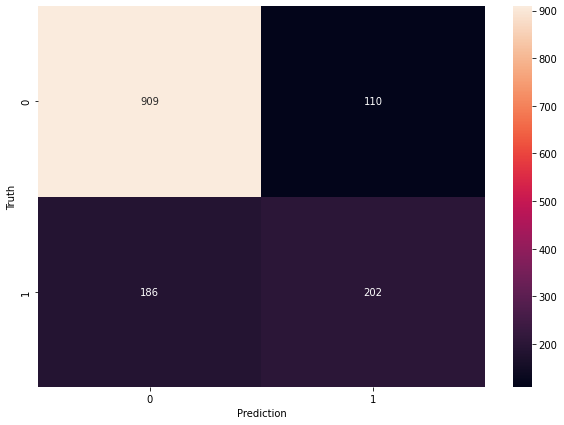

In [264]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [267]:
# Precision for 0 class, i.e. Prediction for customer who did not churn
print('Prediction for customer who did not churn:',round(909/(909+202),2))

Prediction for customer who did not churn: 0.82


In [268]:
# Precision for 1 class, i.e. Prediction for customer who churn
print('Prediction for customer who actually churned:',round(202/(202+110),2))

Prediction for customer who actually churned: 0.65
